# House Prices - Advanced Regression Techniques

- Utilizaando os [dados disponíveis no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - Dataset de competição
    - A avaliação será através do erro quadrático médio

## Modelos 2 - Criando Modelo
- O objetivo é aplicar alguns algoritimos sobre a base criada na parte anterior de forma a encontrar aquele com melhor resultado.

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando as bases
treino = pd.read_csv('train2.csv')
teste = pd.read_csv('test2.csv')

In [11]:
# Verificando o formato da base
treino.shape

(1460, 81)

In [12]:
# Verificando o formato da base
teste.shape

(1459, 80)

In [3]:
# Verificando o tipo de dados nas colunas
treino.dtypes.value_counts()

object     43
int64      35
float64     3
Name: count, dtype: int64

In [4]:
# Verificando o tipo de dados nas colunas
teste.dtypes.value_counts()

object     43
int64      26
float64    11
Name: count, dtype: int64

- Separando as colunas numéricas das de texto

In [10]:
# Selecionando apenas as colunas numéricas
cols_nr = treino.columns[treino.dtypes != 'object']
cols_nr

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
# Criando uma nova base com esses valores
treino = treino.loc[:,cols_nr]
treino.shape

(1460, 38)

In [14]:
# Criando uma nova base com esses valores (teste não possui a coluna SalePrice)
teste = teste.loc[:,cols_nr[cols_nr != 'SalePrice']]
teste.shape

(1459, 37)

## Algoritmos
- Separando em treino e teste: 
    - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Algoritmos Utilizados
    - **Regressão Linear**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    - **Árvore de Regressão**:
        - https://scikit-learn.org/stable/modules/tree.html#regression
    - **KNeighborsRegressor**:
        - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

In [15]:
# Selecionando X e y
X = treino.drop('SalePrice',axis=1)
y = treino.SalePrice

In [16]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [17]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Regressão Linear

In [18]:
# Importando a regressão linear
from sklearn.linear_model import LinearRegression

In [19]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [20]:
# Fazendo a previsão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)

#### Árvore de Regressão

In [21]:
# Importando a árvore de regressão
from sklearn import tree

In [22]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)

In [23]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

#### KNeighborsRegressor

In [24]:
# Importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [25]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [26]:
# Fazendo a previsão
y_pred_knn = reg_knn.predict(X_test)

## Avaliando os resultados
- Erro médio absoluto:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- Erro quadrático médio:
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [28]:
# Importando o erro médio absoluto e o erro quadrático médio
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [30]:
# Erro regressão linear
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_rl)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_rl)}')

Erro absoluto: 23908.412412289534
Erro quadrático: 1546018499.3696394


In [31]:
# Erro árvore de decisão
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_ad)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_ad)}')

Erro absoluto: 26458.126556016596
Erro quadrático: 1590177832.9273858


In [32]:
# Erro knn
print(f'Erro absoluto: {mean_absolute_error(y_test, y_pred_knn)}')
print(f'Erro quadrático: {mean_squared_error(y_test, y_pred_knn)}')

Erro absoluto: 33247.14937759336
Erro quadrático: 2732965076.467842


- **Visualizando graficamente**

In [33]:
# Importando o matplotlib
import matplotlib.pyplot as plt

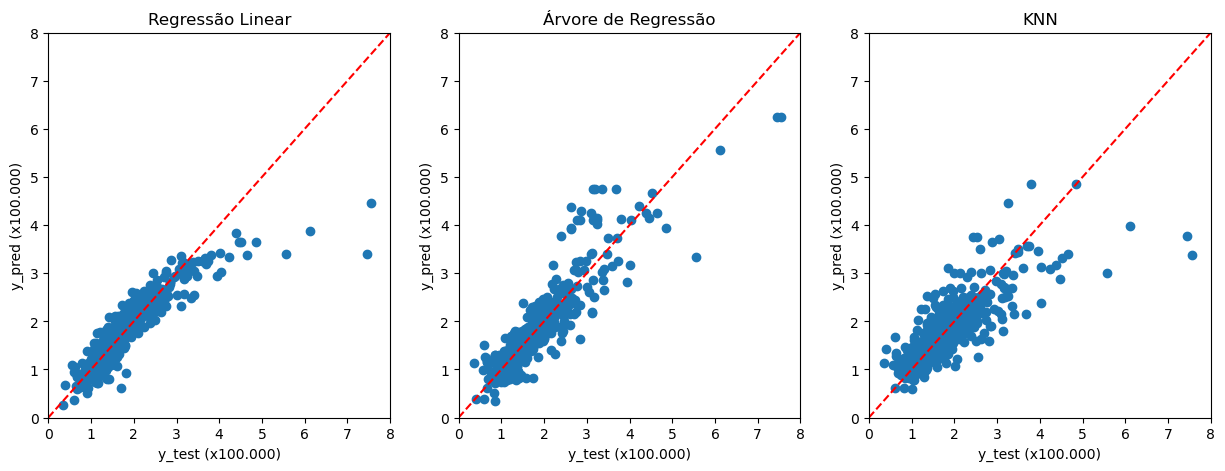

In [34]:
# Criando esse gráfico
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0,8],[0,8],'--r')
ax[0].set(xlim=(0, 8),ylim=(0, 8))
ax[0].set_xlabel('y_test (x100.000)')
ax[0].set_ylabel('y_pred (x100.000)')
ax[0].set_title('Regressão Linear')

ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0,8],[0,8],'--r')
ax[1].set(xlim=(0, 8),ylim=(0, 8))
ax[1].set_xlabel('y_test (x100.000)')
ax[1].set_ylabel('y_pred (x100.000)')
ax[1].set_title('Árvore de Regressão')

ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0,8],[0,8],'--r')
ax[2].set(xlim=(0, 8),ylim=(0, 8))
ax[2].set_xlabel('y_test (x100.000)')
ax[2].set_ylabel('y_pred (x100.000)')
ax[2].set_title('KNN')

plt.show()

## Construindo Previsão
- Utilizando a **regressão linear**

In [35]:
# Fazer a previsão
y_pred = reg_rl.predict(teste)

In [36]:
# Adicionando a coluna na base
teste['SalePrice'] = y_pred

In [37]:
# Extraindo as colunas Id e SalePrice
resultado = teste[['Id','SalePrice']]

In [38]:
# Exportando para um csv
resultado.to_csv('resultado2.csv', index=False)

- **Resultado**
<img src="pkgImagens/resultado2.png" width=900>